<center>
<b><span style="font-size: 40px;">Short term rental review</span></b>
</center>

I am aiming at creating a complete workflow for extracting, transforming and loading data from SQL, then extracting insights and maybe performing some Machine leraning.

The data was made public in a cloud-based server of ElephantSQL. Through this notebook the details to connect to the server will be specified.

<b><span style="font-size: 25px;">STAGE 1:</span></b> <span style="font-size: 20px;">Connecting to the ElephantSQL server and extracting data</span>

In [1]:
# Importing libraries #

import psycopg2 # Library for connecting Python to PostgreSQL
import pandas as pd # Library to analyze data

In [2]:
# THIS CELL is for connecting python to the Database in a cloud-based option of ElephantSQL

# Connection details - This can be found in the section details of the account in ElephantSQL
host = 'otto.db.elephantsql.com'
port = 5432 # This is by default
database = 'hxdwqjgi'
user = 'hxdwqjgi'
password = '0jSTFyXbWybK5g6FdJkKQJ4687Z4J3aH'

# Connect to the database
conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)

# Create a cursor object to interact with the database
cursor = conn.cursor()


In [3]:
# Retrive each table on the database in order to check them 
# and perform any transformation needed

def fetch_data(table_name):
    '''

    Definition: Function to retrive fata from a public server of ElephantSQL
    Arguments: table_name The name of the table on the server
    
    '''

    # Fetching the data from the table
    cursor.execute(f"SELECT * FROM {table_name}")
    data = cursor.fetchall()

    # Getting the column names from the cursor description
    column_names = [desc[0] for desc in cursor.description]

    # Creating a DataFrame from the fetched data and column names
    df = pd.DataFrame(data, columns=column_names)

    return df

# Creating the data frames for each table in order to evaluate the data integrity
prices_df = fetch_data("prices")
reviews_df = fetch_data("reviews")
room_types_df = fetch_data("room_types")

conn.close()

<b><span style="font-size: 25px;">STAGE 2:</span></b> <span style="font-size: 20px;">Preliminary view and data transforming (if needed it)</span>

In order to not only apply ETL practices but also analyze the distribution of numerical variables and understand the centrality and tendencies of the data, it was decided to perform all extraction and transformation procedures on the dataset through Python. Although these procedures could have been done directly in any SQL server, such as ElephantSQL, Python offers greater flexibility for conducting this EDA stage.

<span style="font-size: 25px;">1. Prices Table</span>

The Dataframe consists of seven columns, Out of which five are numeric variables: <b><span style="color: green;">listing_id, price, price_per_month, lattitude and longitude</span></b>. Only the price columns can be considered as numeric variables <b>(price and price_per_month)</b>. The remaining columns serve as identifiers, sucha as <b>listing_id</b> and the last two are location coordinates for the different rental places.

Examining the non-numerical variables, it is observed five boroughs: <b><span style="color: green;">Brooklyn, Manhattan, Queens, Bronx, Staten Island</span></b>. Brooklyn and Manhattan emerge as the predominant ones, accounting for approxumately <b>82%</b> of the rentals combined. Across these five boroughs, there a total of <b>216 neighbourhoods</b>, non of which surpasses <b>10%</b> of the overall rental places availabale in the database.

Important to mention that the table does not contain null values and the data types of the columns match with the values type encounter in them

In [4]:
from IPython.display import display

# General description
display(prices_df.describe()) # Identifying variable types
display(prices_df.head())
# Data types
display(prices_df.dtypes)

# Description for non-numeric variables
def get_count_percentage(df, column):
    ### Definition: Extract unique values from non-numeric variables, counts them and give the percentage of each value respect
    ###             to the total. Finally, shows the results in a small dataframe composed by 2 columns

    ### Arguments: df=Dataframe name
    ###            column=non-numeric variable column name

    column_count = df[column].value_counts()
    total_count = column_count.sum()
    percentage = (column_count / total_count) * 100

    result = pd.concat([column_count, percentage], axis=1)
    result.columns = ['Count', 'Percentage']

    return result

display(get_count_percentage(prices_df, 'borough'), get_count_percentage(prices_df, 'neighbourhood'))

##########################################################################################
#borough_count = prices_df['borough'].value_counts()
#total_count_borough = borough_count.sum()
#percentage_borough = (borough_count / total_count_borough) * 100

#result_borough = pd.concat([borough_count, percentage_borough], axis=1)
#result_borough.columns = ['Count', 'Percentage']

#neighbourhood_count = prices_df['neighbourhood'].value_counts()
#total_count_neighbourhood = neighbourhood_count.sum()
#percentage_neighbourhood = (neighbourhood_count / total_count_neighbourhood) * 100

#result_neighbourhood = pd.concat([neighbourhood_count, percentage_neighbourhood], axis=1)
#result_neighbourhood.columns = ['Count', 'Percentage']

#display(result_borough, result_neighbourhood)
##########################################################################################

,listing_id,price,price_per_month,latitude,longitude
count,2.520200e+04,25202.000000,25202.000000,25202.000000,25202.000000
mean,2.068920e+07,141.817316,4313.610031,40.727145,-73.947975
std,1.103081e+07,147.350650,4481.915598,0.056304,0.050951
min,2.595000e+03,10.000000,304.166667,40.506410,-74.244420
25%,1.202115e+07,69.000000,2098.750000,40.687400,-73.982608
50%,2.234547e+07,105.000000,3193.750000,40.721050,-73.953000
75%,3.037697e+07,175.000000,5322.916667,40.762577,-73.929733
max,3.645581e+07,7500.000000,228125.000000,40.913060,-73.712990


,listing_id,price,borough,neighbourhood,price_per_month,latitude,longitude
0,2595,225,Manhattan,Midtown,6843.750000,40.75362,-73.98377
1,3831,89,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976
2,5099,200,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500
3,5178,79,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493
4,5238,150,Manhattan,Chinatown,4562.500000,40.71344,-73.99037


listing_id           int64
price                int64
borough             object
neighbourhood       object
price_per_month    float64
latitude           float64
longitude          float64
dtype: object

,Count,Percentage
borough,,
Brooklyn,10460,41.504642
Manhattan,10322,40.957067
Queens,3456,13.713197
Bronx,697,2.765654
Staten Island,267,1.059440


,Count,Percentage
neighbourhood,,
Bedford-Stuyvesant,2206,8.753274
Williamsburg,1853,7.352591
Harlem,1435,5.693993
Bushwick,1199,4.757559
Hell's Kitchen,1119,4.440124
...,...,...
Lighthouse Hill,1,0.003968
Co-op City,1,0.003968
Little Neck,1,0.003968


<span style="font-size: 25px;"><b>Spread and Centrality analysis</b></span>

A histogram and a cumulative distribution plots are using to get a better visual of the data distribution behaviour for the numerical variables in this prices table. The price columns have the following spread and centrality measures

| Variable | Price (USD)   | Price/month (USD) |
| -------- | --------      | --------          |
| Mean     | 141.8         | 4313.6            |    
| Median   | 105           | 4193.8            |
| Std. Dev   | 147.4           | 4481.9           |

The privous table plus the plots showed below help to identify that range in which you should budget your stay in NY should be in <b>between 80 to 250 USD/night</b>. However, having a <b>std. dev. higher the mean (both variables)</b> indicates the data is <b>spread out</b>. Therefore, either cheap deals and expensive rentals can be seen in the area of NY. And it is consequent with this touristic city.

Also, these plots depict that the these two variables are <b>right-skewed</b> meaning they have several extreme values to the right side of plot. Showing that there will be rentals very expensive in the area of NY, <b>overpassing the 1000 USD a night.</b>

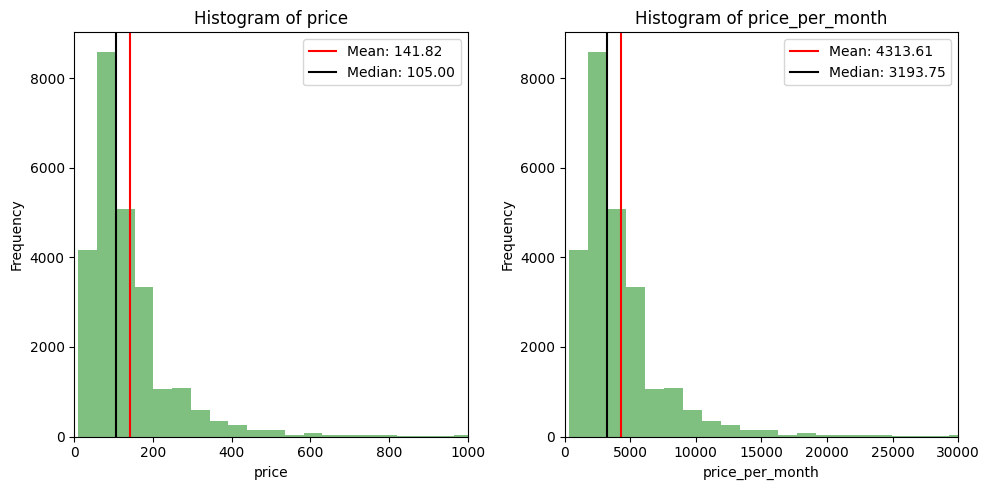

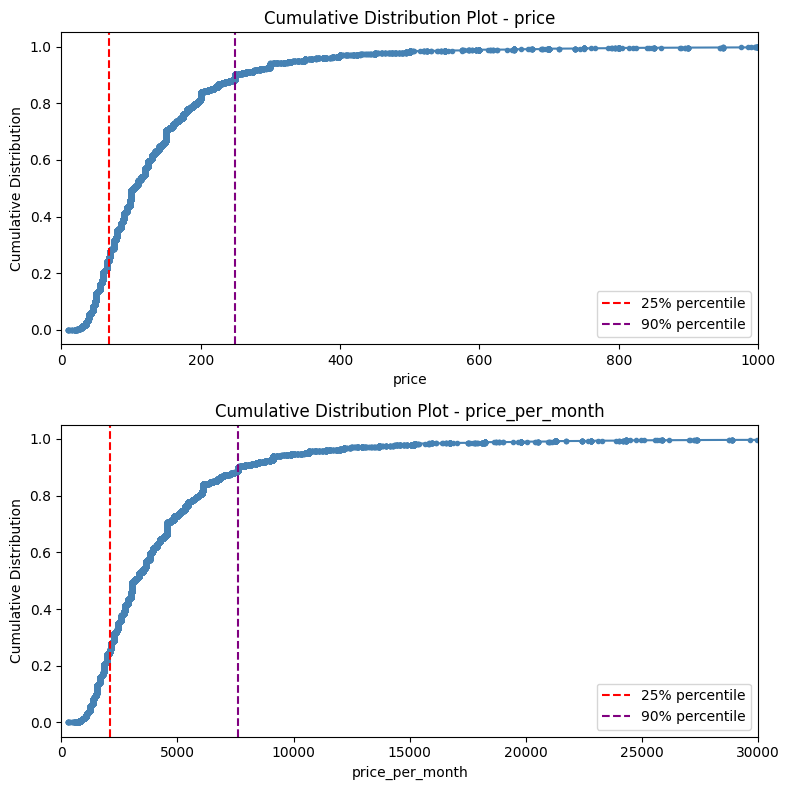

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# To visualize the distribution of numerical variables.
def plot_histograms(data, column_names, num_bins=None, xlim=None, ylim=None, auto_bins=True):
    ### 
    #   definition: Allows to evaluate visually and numerically the skewness of the distribution
    #               The function will plot the distribution in a histogram and will add two lines
    #               representing the mean and median fo the distribution
    #   Arguments:  Contains 5 arguments
    #               data = Dataframe name *Mandatory
    #               column_names = Specific columns to evaluate - Must be numerical variables *Mandatory
    #               num_bins = Number of bins for the histogram. Desired value as number, if set as 'auto' it will be equal to 10
    #                          and if it is not specified, it will be calculated from data min and max (recommended option) *Mandatory if auto_bins=False
    #               xlim = X axis limits to have more control on the zooming of the plot *Optional
    #               ylim = Y axis limits to have more control on the zooming of the plot *Optional
    #               auto_bins = When set as True. Bins will be calculated from the data. If it is False, customize bin numbers should
    #                           be specified in the argument num_bins *Mandatory
    ###
    
    num_plots = len(column_names)
    num_rows = (num_plots + 1) // 2  # Calculate the number of rows for subplots
    
    if num_bins is None:
        num_bins = 'auto' if auto_bins else 10  # Use automatic binning or default to 10 bins
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 5))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for i, column_name in enumerate(column_names):
        if auto_bins:
            min_value = np.min(data[column_name])
            max_value = np.max(data[column_name])
            if num_bins == 'auto':
                num_bins = int(np.sqrt(len(data[column_name])))  # Calculate number of bins automatically
            bins = np.linspace(min_value, max_value, num_bins)
        else:
            bins = num_bins[i]
        
        axes[i].hist(data[column_name], bins=bins, alpha=0.5, color='green')
        axes[i].set_xlabel(column_name)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Histogram of {column_name}')
        
        mean = np.mean(data[column_name])
        median = np.median(data[column_name])
        
        axes[i].axvline(mean, color='r', linestyle='-', label=f'Mean: {mean:.2f}')
        axes[i].axvline(median, color='black', linestyle='-', label=f'Median: {median:.2f}')
        axes[i].legend()
        
        if xlim is not None:
            if isinstance(xlim[i], tuple):
                axes[i].set_xlim(xlim[i])
            else:
                axes[i].set_xlim(xlim)

        if ylim is not None:
            if isinstance(ylim[i], tuple):
                axes[i].set_ylim(ylim[i])
            else:
                axes[i].set_ylim(ylim)
    
    # Hide any unused subplots
    for j in range(num_plots, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# CUMULATIVE DISTRIBUTION PLOT
def plot_cumulative_prob(data, column_names, xlim=None):
    ### 
    #   definition: Allows to plot the cumulative distribution of dataset
    #   Arguments:  Contains 3 arguments
    #               data = Dataframe name *Mandatory
    #               column_names = Specific columns to evaluate - Must be numerical variables *Mandatory
    #               xlim = X axis limits to have more control on the zooming of the plot *Optional
    ###

    num_columns = len(column_names)
    fig, axs = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, num_columns * 4))

    for i, column_name in enumerate(column_names):
        sorted_data = np.sort(data[column_name])
        y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        axs[i].plot(sorted_data, y, marker='.', linestyle='-', color='steelblue')
        axs[i].axvline(np.percentile(data[column_name], 25), color='red', linestyle='--', label='25% percentile')
        #axs[i].axvline(np.percentile(data[column_name], 75), color='green', linestyle='--', label='75% percentile')
        axs[i].axvline(np.percentile(data[column_name], 90), color='purple', linestyle='--', label='90% percentile')
        axs[i].set_xlabel(column_name)
        axs[i].set_ylabel('Cumulative Distribution')
        axs[i].set_title(f'Cumulative Distribution Plot - {column_name}')
        axs[i].legend()

        if xlim is not None:
            if isinstance(xlim, tuple):
                axs[i].set_xlim(xlim)
            elif isinstance(xlim, list) and len(xlim) > i and isinstance(xlim[i], tuple):
                axs[i].set_xlim(xlim[i])

    plt.tight_layout()
    plt.show()

xlims = [(0, 1000), (0, 30000)]
plot_histograms(prices_df, ['price', 'price_per_month'], xlim=xlims, auto_bins=True)

custom_xlim = [(0, 1000), (0, 30000)]
plot_cumulative_prob(prices_df, ['price', 'price_per_month'], xlim=custom_xlim)

<span style="font-size: 25px;">2. Reviews Table</span>

Generally speaking, Most of the columns are numeric variables, with the exception of listing_id and name. It can be performed the same preliminary analysis as the previous table (Prices) related to the numeric variables. There ar not non-numeric variables worth of performing any kind of analysis. Besides, There are not null values and the initial data types correspond with the kind of variable

New information from this table can be extracted. Now, it is known that the dataset correspond to the period from January 2019 to July 2019


In [6]:
# General description
display(reviews_df.describe()) # Identifying variable types
display(reviews_df.head())
# Data types
display(reviews_df.dtypes)

,listing_id,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365
count,2.520900e+04,25209,25209.000000,25209.000000,25209.000000,25209.000000,25209.000000,25209.000000
mean,2.068922e+07,2019-05-30 07:58:41.171010560,4.898013,40.214011,1.974105,6.147606,146.400849,218.599151
min,2.595000e+03,2019-01-01 00:00:00,1.000000,1.000000,0.020000,1.000000,0.000000,0.000000
25%,1.202273e+07,2019-05-23 00:00:00,1.000000,5.000000,0.650000,1.000000,22.000000,96.000000
50%,2.234391e+07,2019-06-18 00:00:00,2.000000,18.000000,1.460000,1.000000,116.000000,249.000000
75%,3.037669e+07,2019-06-29 00:00:00,4.000000,53.000000,2.840000,2.000000,269.000000,343.000000
max,3.645581e+07,2019-07-09 00:00:00,365.000000,629.000000,58.500000,327.000000,365.000000,365.000000
std,1.102928e+07,NaN,10.408063,55.316624,1.796714,31.354740,127.125808,127.125808


,listing_id,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365
0,2595,Jennifer,2019-05-21,1,45,0.38,2,355,10
1,3831,LisaRoxanne,2019-07-05,1,270,4.64,1,194,171
2,5099,Chris,2019-06-22,3,74,0.59,1,129,236
3,5178,Shunichi,2019-06-24,2,430,3.47,1,220,145
4,5238,Ben,2019-06-09,1,160,1.33,4,188,177


listing_id                                 int64
host_name                                 object
last_review                       datetime64[ns]
minimum_nights                             int64
number_of_reviews                          int64
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
booked_days_365                            int64
dtype: object

<span style="font-size: 25px;"><b>Spread and Centrality analysis</b></span>

<span style="font-size: 20px;">Minimum Nights</span>

The distrubution tends to be concentrated around 7 nights or berlow (90% percentile). However, in one hand the std. dev. is much larger than the mean (10.4>4.9), therefore the data is highly dispersed and the variable is Right-skwed, these two factors indicate that there are owners just allowing to book large period of time or tenants rent for very long long time (Peak in 30ays bar),would be interesting to know the reason of this behaviour.

<span style="font-size: 20px;">Number of reviews</span>

From this preliminar analysis, it just can be said that the data set is right-skewed, may this is given by the fact that the longer the rental is listed the more reviews will get from tenants. However, this has to be checked in a further analysis.

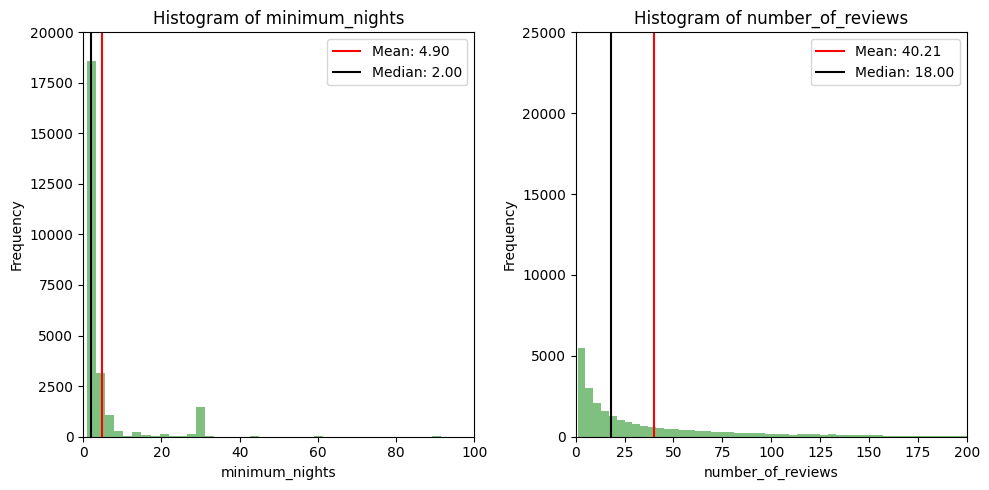

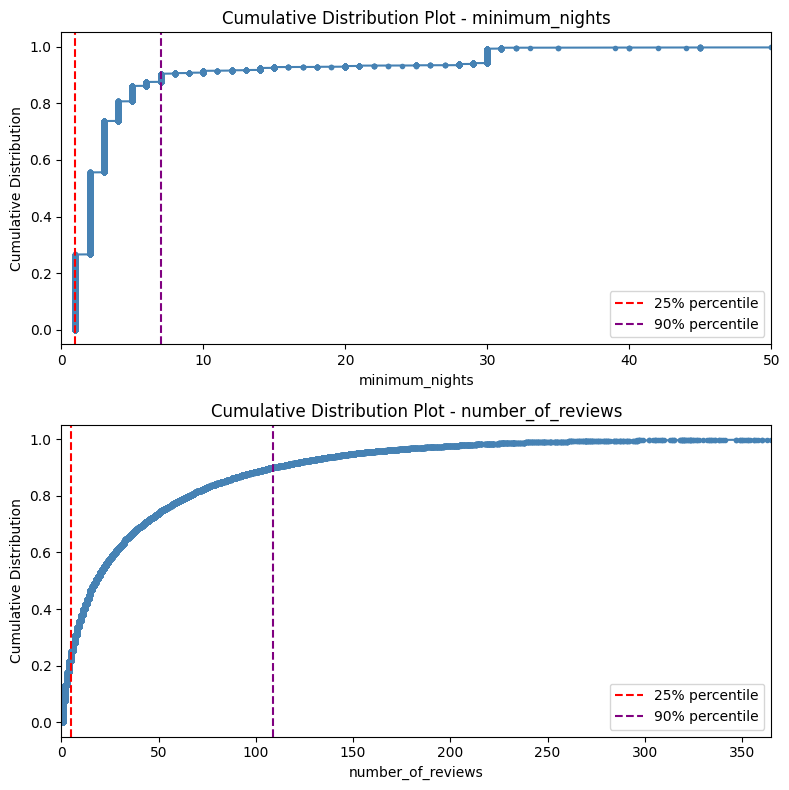

In [7]:
# Histograms Minimum nights and number of reviews
ylims1 = [(0, 20000), (0, 25000)]
xlims1 = [(0, 100), (0, 200)]
plot_histograms(reviews_df, ['minimum_nights', 'number_of_reviews'], xlim=xlims1, ylim=ylims1, auto_bins=True)

# Cum Distribution Minimum nights and number of reviews
custom_xlim1 = [(0, 50), (0, 365)]
plot_cumulative_prob(reviews_df, ['minimum_nights', 'number_of_reviews'], xlim=custom_xlim1)


<span style="font-size: 20px;">Reviews per month</span>

From this preliminar analysis, it just can be said that the data set is right-skewed, may this is given by the fact that the longer the rental is listed the more reviews will get from tenants. However, this has to be checked in a further analysis.

<span style="font-size: 20px;">Listings per host</span>

The variable is right-skewed, meaning that there are hosts who have large number of rentals. However, the most common numer is one listing per host.

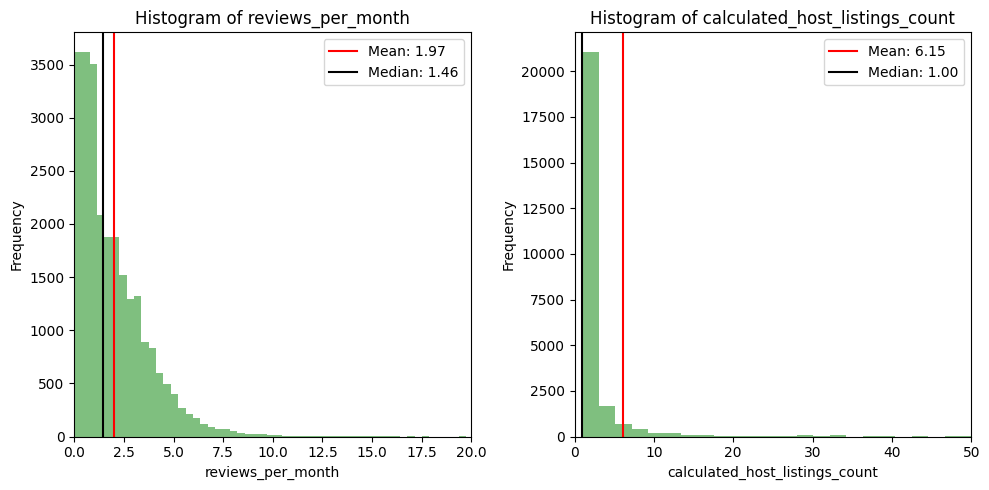

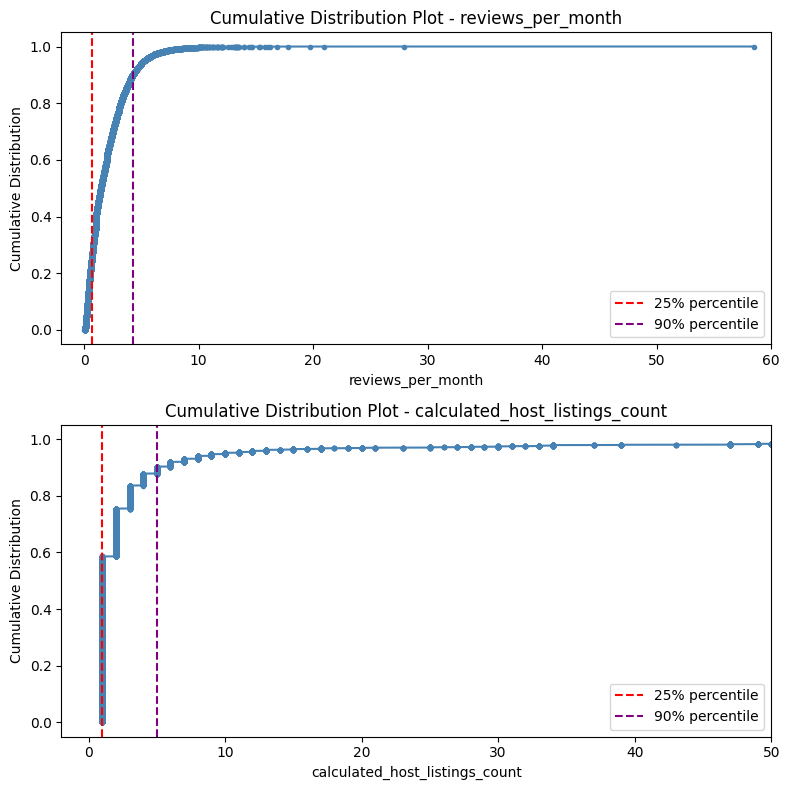

In [8]:
#  Histogram for reviews per month and calculated_host_listings_count
xlims2 = [(0, 20), (0, 50)]
plot_histograms(reviews_df, ['reviews_per_month', 'calculated_host_listings_count'], xlim=xlims2, auto_bins=True)

# Cum Distribution reviews per month and calculated_host_listings_count
custom_xlim2 = [(-2, 60), (-2, 50)]
plot_cumulative_prob(reviews_df, ['reviews_per_month', 'calculated_host_listings_count'], xlim=custom_xlim2)

<span style="font-size: 20px;">Availability in the next 365days</span> - <span style="font-size: 20px;">Booked days in the next 365days</span>

These two variables are quite different from the previous ones. They refer to the availability of the rental in hte next year. Reason why the histograms do not show a clear tendency. Same goes for the cumulative distribution plots. The box plot will give a better interpretation of the listing availability

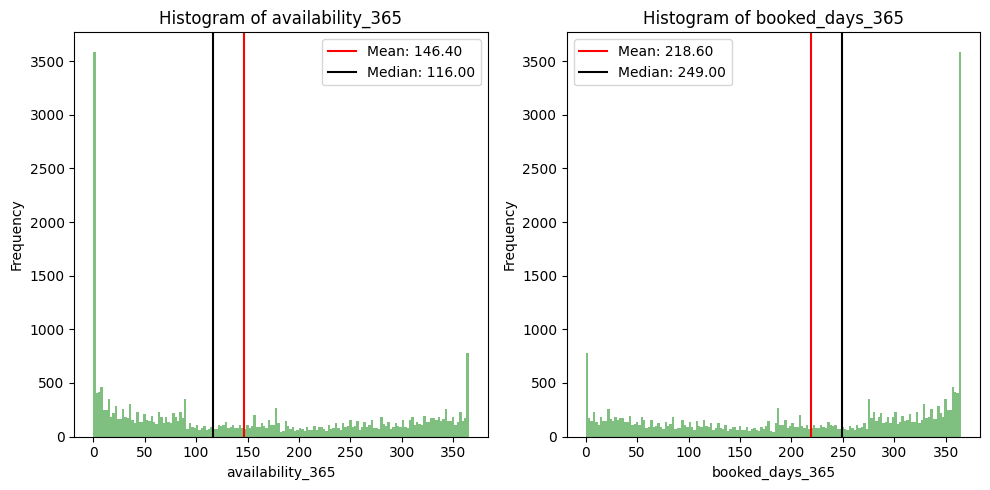

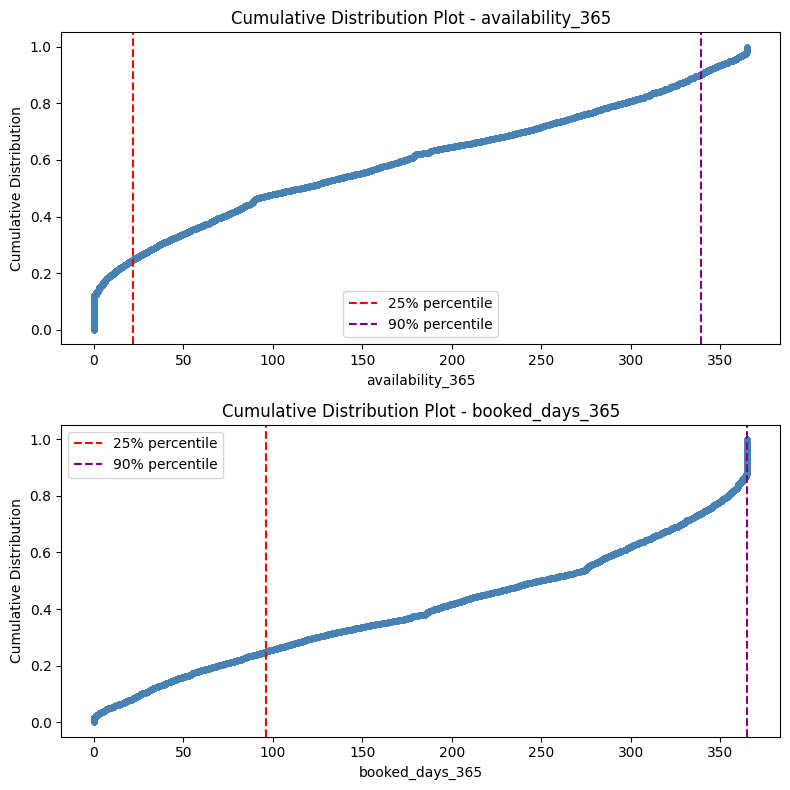

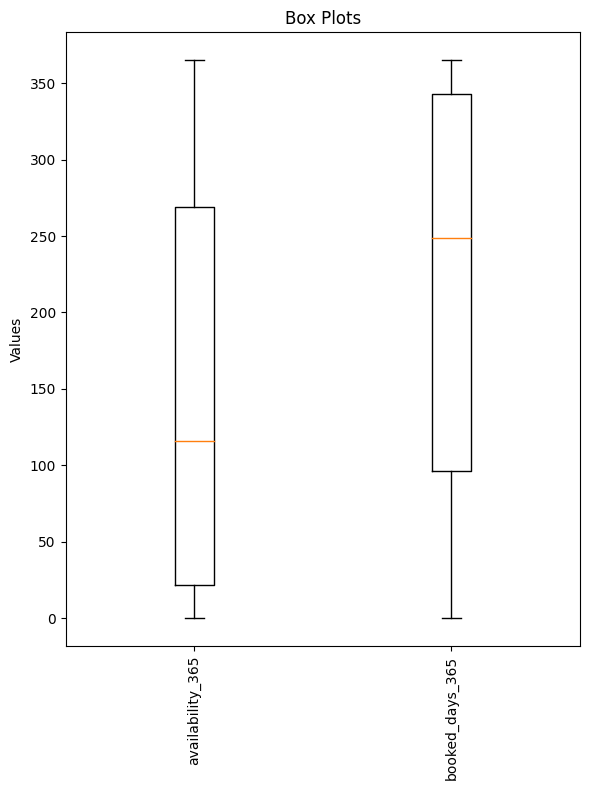

In [9]:
#  Histogram for availability_365 and booked_days_365
plot_histograms(reviews_df, ['availability_365', 'booked_days_365'], auto_bins=True)

# Cum Distribution availability_365 and booked_days_365
#custom_xlim2 = [(-2, 60), (-2, 50)]
plot_cumulative_prob(reviews_df, ['availability_365', 'booked_days_365'])#, xlim=custom_xlim2)

# Box plots availability_365 and booked_days_365
def plot_boxplots(data, column_names, xlim=None):
    ###
    # Definition: Generate a vertical boxplots from a dataframe
    # Arguments:
    #             data = Dataframe name
    #             column_names= Names of the column that you want to use the generate the boxplots
    #             xlim= In the case you want to control the axis zoom.
    ###
    num_plots = len(column_names)

    fig, ax = plt.subplots(figsize=(6, 8))

    box_plot = ax.boxplot(data[column_names].values, vert=True)
    ax.set_xticklabels(column_names, rotation=90)
    ax.set_ylabel('Values')
    ax.set_title('Box Plots')

    if xlim is not None:
        if isinstance(xlim, tuple):
            ax.set_ylim(xlim)
        else:
            ax.set_ylim(xlim)

    for i, column_name in enumerate(column_names):
        box = box_plot['boxes'][i]
        median = box_plot['medians'][i]
        whisker_bottom = box_plot['whiskers'][2 * i]
        whisker_top = box_plot['whiskers'][2 * i + 1]

        # Calculate offset for annotation positioning
        #offset = np.abs(box.get_ydata()[0] - whisker_bottom.get_ydata()[1]) / 20
        #y_min, y_max = ax.get_ylim()
        #y_range = y_max - y_min

        # # Adjust annotation position if close to y-axis limit
        # if np.abs(box.get_ydata()[0] - y_min) < y_range * 0.05:
        #     offset *= -1

        # # Add mean annotation
        # ax.annotate(
        #     f'Mean: {np.mean(data[column_name]):.2f}',
        #     xy=(0.5, np.mean(data[column_name])),
        #     xytext=(10, np.sign(offset) * 20),
        #     textcoords='offset points',
        #     ha='center',
        #     va='center',
        #     color='r',
        #     fontsize=8,
        # )

    plt.tight_layout()
    plt.show()

plot_boxplots(reviews_df, ['availability_365', 'booked_days_365'])

<span style="font-size: 25px;">2. Room types Table</span>

Generally speaking, it is a non-numeric table. No need of preliminarly EDA in terms of dpread and centrality
What it can be infer so far is that the rentals listed in NY city refer to private rooms or entire apt. They together represent more than 97% of the listings in the city.

In [10]:
# General description
#display(room_types_df.describe()) # Identifying variable types
display(room_types_df.head())
# Data types
display(room_types_df.dtypes)

# Description for non-numeric variables
display(get_count_percentage(room_types_df, 'room_type'))

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,entire home/apt
1,3831,Cozy Entire Floor of Brownstone,entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt


listing_id      int64
description    object
room_type      object
dtype: object

,Count,Percentage
room_type,,
entire home/apt,13265,52.622183
private room,11356,45.049191
shared room,587,2.328626


<b><span style="font-size: 25px;">STAGE 3:</span></b> <span style="font-size: 20px;">General Business Analysis</span>

All preliminary analysis on the dataset has finished and the data has been cleaned up and now we have a better understanding of the business operation.

We will proceed to perform some further analysis to provide business insights and alternatives

<b><span style="font-size: 25px;"><span style="color: green;">3.1 PRICING ANALYSIS</span></b>

3.1.1. Average price per month for each borough and neighbourhood

Manhattan is the borough with higher average price per month with <b>5596.7 USD</b>

Sea Gate from Brookly borough is the neighbourhood with higher average price per month with <b>24485 USD</b> which is almost the double compare to the neighbourhood in the second place

In [11]:
import seaborn as sns
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

# Connect to the database
conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)
cursor = conn.cursor()

# QUERY BOROUGH
avg_price_borough_query = ("SELECT borough, AVG(price_per_month) "
                          "FROM prices "
                          "GROUP BY borough "
                          "ORDER BY AVG(price_per_month) DESC")
cursor.execute(avg_price_borough_query)

# Creating a DataFrame from the fetched data and column names
avg_price_borough_data= cursor.fetchall()
avg_price_borough_df = pd.DataFrame(avg_price_borough_data, columns=['borough', 'Average price'])



# Creating a bar plot using Plotly Express
fig_borough = px.bar(avg_price_borough_df, x='borough', y='Average price')

# Adding labels and title
fig_borough.update_layout(
    xaxis_title='Borough',
    yaxis_title='Average Price',
    title='Average Price per Borough'
)

# QUERY NEIGHBOURGOOD
avg_price_neighbourhood_query = ("SELECT neighbourhood, borough, AVG(price_per_month) "
                          "FROM prices "
                          "GROUP BY neighbourhood, borough "
                          "ORDER BY AVG(price_per_month) DESC")
cursor.execute(avg_price_neighbourhood_query)

# Creating a DataFrame from the fetched data and column names
avg_price_neighbourhood_data= cursor.fetchall()
avg_price_neighbourhood_df = pd.DataFrame(avg_price_neighbourhood_data, columns=['neighbourhood', 'borough', 'Average price'])

# Creating a bar plot using Plotly Express
fig_neighbourhood = px.bar(avg_price_neighbourhood_df, x='neighbourhood', y='Average price')

# Adding labels and title
fig_neighbourhood.update_layout(
    xaxis_title='neighbourhood',
    yaxis_title='Average Price',
    title='Average Price per neighbourhood'
)

# Displaying the plot
fig_borough.show()
fig_neighbourhood.show()
display(avg_price_borough_df.head())
display(avg_price_neighbourhood_df.head())

conn.close()

C:\Users\LFLT1\AppData\Local\Temp\ipykernel_13824\743775097.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\LFLT1\AppData\Local\Temp\ipykernel_13824\743775097.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


,borough,Average price
0,Manhattan,5596.687294
1,Brooklyn,3710.062739
2,Queens,2823.090881
3,Staten Island,2617.200375
4,Bronx,2410.248087


,neighbourhood,borough,Average price
0,Sea Gate,Brooklyn,24485.416667
1,Tribeca,Manhattan,12066.441257
2,Flatiron District,Manhattan,10404.189815
3,NoHo,Manhattan,10190.325204
4,SoHo,Manhattan,9099.520070


3.1.2. Price variation based on room type

An entire home/apt is the type of rental that is the most expensive in general accross the listing with around <b>5997 USD per month</b>

In [12]:
# Connect to the database
conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)
cursor = conn.cursor()

# QUERY price variation based on room type
avg_price_room_type_query = ("SELECT rt.room_type, AVG(p.price_per_month) AS avg_price "
                             "FROM room_types rt "
                             "JOIN prices p ON rt.listing_id = p.listing_id "
                             "GROUP BY rt.room_type "
                             "ORDER BY avg_price DESC")

#FUNCTION TO AUTOMATIZE THE FETCHING OF THE DATA FROM THE SERVER
def execute_query(query, column_names=None):
    ###
    # Definition: It allows to extract the data from the SQL server to a pandas dataframe
    #             No matter the amount of columns. You can provide the specific names to them
    #             or allow to the function to give them the default ones
    # Arguments:
    #             query = SQL query you want to convert into a dataframe
    #             column_names = Names of the columns. If you want to specify them use ['']
    #                            Otherwise leave it as None, will get the default values
    ###
    cursor.execute(query)
    data = cursor.fetchall()
    
    if column_names:
        df = pd.DataFrame(data, columns=column_names)
    else:
        columns = [desc[0] for desc in cursor.description]
        df = pd.DataFrame(data, columns=columns)
    
    return df

columns=['room_type', 'Average Price']
avg_price_room_type_df = execute_query(avg_price_room_type_query, column_names=columns)

# Creating a bar plot using Plotly Express
fig_room = px.pie(avg_price_room_type_df, names='room_type', values='Average Price',
             title='Average Price Based on Room Type',
             labels={'room_type': 'Room Type', 'Average Price': 'Average Price'})

fig_room.show()
display(avg_price_room_type_df)

conn.close()

,room_type,Average Price
0,entire home/apt,5997.226536
1,private room,2484.254654
2,shared room,1631.789174


3.1.3. Seasonal price trends

Based on the weekly plot, there is not a major trend than can be spot it. Generally speaking it could be said that there is no seasonality. However, what it can be observed on monthly basis is that when weather start to become warmer, meaning spring and summer, the monthly prices start to rise

From end of March, Which is understandable since the peak of the warmer season is coming. 

In [13]:
# Connect to the database
conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)
cursor = conn.cursor()

#QUERY MONTH
avg_price_month_query = ("SELECT TO_CHAR(r.last_review, 'Month YYYY') AS month_year, AVG(p.price_per_month) AS average_price "
                            "FROM reviews r "
                            "JOIN prices p ON r.listing_id = p.listing_id "
                            "GROUP BY month_year "
                            "ORDER BY MIN(r.last_review)")

#Extract to a dataframe - month
avg_price_month_df = execute_query(avg_price_month_query)#, column_names=columns)

#Plot month
fig_month = px.line(avg_price_month_df, x='month_year', y='average_price', title='Total average price per month', labels={'month_year': 'Month and Year', 'average_price': 'Average Price'})

#QUERY WEEK
avg_price_week_query = ("SELECT CONCAT(TO_CHAR(MIN(r.last_review), 'Mon DD'), ' - ', TO_CHAR(MAX(r.last_review), 'Mon DD, YYYY')) AS week_period, AVG(p.price_per_month) AS average_price "
                            "FROM reviews r "
                            "JOIN prices p ON r.listing_id = p.listing_id "
                            "GROUP BY EXTRACT(WEEK FROM r.last_review) "
                            "ORDER BY MIN(r.last_review)")

#Extract to a dataframe - week
avg_price_week_df = execute_query(avg_price_week_query)#, column_names=columns)

#Plot week
fig_week = px.line(avg_price_week_df, x='week_period', y='average_price', title='Total average price per week', labels={'week_period': 'Week and Year', 'average_price': 'Average Price'})


fig_month.show()
fig_week.show()
display(avg_price_month_df, avg_price_week_df.head(10))



,month_year,average_price
0,January 2019,4275.252604
1,February 2019,4429.054965
2,March 2019,4144.085366
3,April 2019,4356.017628
4,May 2019,4246.224290
5,June 2019,4309.118735
6,July 2019,4394.838183


,week_period,average_price
0,"Jan 01 - Jan 06, 2019",4586.461007
1,"Jan 07 - Jan 13, 2019",3443.345588
2,"Jan 14 - Jan 20, 2019",3236.333333
3,"Jan 21 - Jan 27, 2019",4146.242284
4,"Jan 28 - Feb 03, 2019",3692.030303
5,"Feb 04 - Feb 10, 2019",3987.550813
6,"Feb 11 - Feb 17, 2019",3808.868590
7,"Feb 18 - Feb 24, 2019",5494.414893
8,"Feb 25 - Mar 03, 2019",4464.440299
9,"Mar 04 - Mar 10, 2019",4478.854167


3.1.4. Borough and neighborhood with the highest and lowest prices



In [14]:
# Connect to the database
conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)
cursor = conn.cursor()

# QUERY monthly
highest_lowest_monthly_prices_query = ("SELECT borough, p.neighbourhood, MAX(price_per_month) AS highest_monthly_price, MIN(price_per_month) AS lowest_monthly_price "
                              "FROM prices p "
                              "GROUP BY borough, p.neighbourhood")

# QUERY
highest_lowest_prices_query = ("SELECT borough, p.neighbourhood, MAX(price) AS highest_price, MIN(price) AS lowest_price "
                              "FROM prices p "
                              "GROUP BY borough, p.neighbourhood")

# Extract to a dataframe
highest_lowest_monthly_prices_df = execute_query(highest_lowest_monthly_prices_query)
highest_lowest_prices_df = execute_query(highest_lowest_prices_query)

display(highest_lowest_monthly_prices_df.head())
display(highest_lowest_prices_df.head())

#plot_boxplots(highest_lowest_monthly_prices_df, ['lowest_monthly_price'])
#plot_boxplots(highest_lowest_monthly_prices_df, ['highest_monthly_price'])

conn.close()

,borough,neighbourhood,highest_monthly_price,lowest_monthly_price
0,Queens,East Elmhurst,8364.583333,486.666667
1,Queens,Woodhaven,6052.916667,882.083333
2,Bronx,Hunts Point,1977.083333,1064.583333
3,Manhattan,Upper East Side,45533.750000,486.666667
4,Brooklyn,Fort Greene,30386.250000,760.416667


,borough,neighbourhood,highest_price,lowest_price
0,Queens,East Elmhurst,275,16
1,Queens,Woodhaven,199,29
2,Bronx,Hunts Point,65,35
3,Manhattan,Upper East Side,1497,16
4,Brooklyn,Fort Greene,999,25


In [15]:
import plotly.graph_objects as go

def plot_boxplots2(dataframe, columns):
    """
    Plots boxplots for the specified columns using Plotly.

    Args:
        dataframe: The pandas DataFrame containing the data.
        columns: A list of column names to plot.

    Returns:
        None
    """
    fig = go.Figure()

    for column in columns:
        fig.add_trace(go.Box(y=dataframe[column], name=column))

    fig.update_layout(
        title='Boxplots',
        yaxis_title='Price',
        width=500,  # Adjust the width as desired
        height=600  # Adjust the height as desired
    )

    fig.show()

bp_Lowest_monthy_fig=plot_boxplots2(highest_lowest_monthly_prices_df, ['lowest_monthly_price'])
bp_Lowest_monthy_fig1=plot_boxplots2(highest_lowest_monthly_prices_df, ['highest_monthly_price'])
bp_Lowest_monthy_fig2=plot_boxplots2(highest_lowest_prices_df, ['lowest_price'])
bp_Lowest_monthy_fig3=plot_boxplots2(highest_lowest_prices_df, ['highest_price'])